In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib.collections import LineCollection
%matplotlib inline 

In [2]:
l = np.genfromtxt('playground_air.txt', usecols=(0,1)) # air is the FULL NEIGHBORHOOD
e = np.genfromtxt('playground_sum.txt', usecols=(0,1)) # sum is the playground
k = np.genfromtxt('playground_spectemps.txt', usecols=(0))
j = np.genfromtxt('playground_spectemps2.txt', usecols=(0))

freq1 = l[:,1]
temp1 = l[:,0]
freq2 = e[:,1]
temp2 = e[:,0]

In [3]:
#Code from http://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter
def savitzky_golay(y, window_size, order, deriv=0, rate=1):

    import numpy as np
    from math import factorial

    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError, msg:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

In [4]:
# Manually setting variables for scatter plots

specs = k[:]
zeros = specs*0
specs2 = j[:]
zeros2 = specs2*0

P = [63.9,55,57.2,46.7,71.1,68.3,63.9]
Pz = [0.4,0.4,0.4,0.4,0.4,0.4,0.4]
A = [53.7,60.7,51.7]
Az = [0.4,0.4,0.4]
S = [59.4,62.8]
Sz = [-0.4,-0.4]
St = [60,60]
Stz = [0,0]
R = [87.2,42.2,50]
Rz = [0,0,0]
C = [56,49.5,52.2]
Cz = [0,0,0]
Cs = [62.2,55,43.9,51.1,51.7,48.9,61.1,55,48.3,46.7,48.3,47.8]
Csz = [-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4]
G = [38.1,40.1]
Gz = [0,0]
Gr = [54.2]
Grz = [0.4]

# Second scatter plot
P2 = [40.6,44.4,45,37.8,43.9]
Pz2 = [0.4,0.4,0.4,0.4,0.4]
A2 = [32.9,40.2]
Az2 = [0.4,0.4]
S2 = [32.8,35.3,33.9,33.9]
Sz2 = [-0.4,-0.4,-0.4,-0.4]
St2 = [39.4,41.1]
Stz2 = [0,0]
R2 = [42.2,46.7,27.8]
Rz2 = [0,0,0]
C2 = [31.8,40.5,35.2]
Cz2 = [0,0,0]
Cs2 = [38.3,38.9,40,37.8,39.4]
Csz2 = [-0.4,-0.4,-0.4,-0.4,-0.4]
G2 = [30.6,43.2]
Gz2 = [0,0]
Gr2 = [35]
Grz2 = [0.4]

In [5]:
yhat1 = savitzky_golay(freq1, 51, 4) # window size 51, polynomial order 4
yhat2 = savitzky_golay(freq2, 101, 4) # window size 101, polynomial order 4

In [6]:
#slice all before 20, after 70
cut1 = temp1[16:231]
ycut1 = yhat1[16:231]

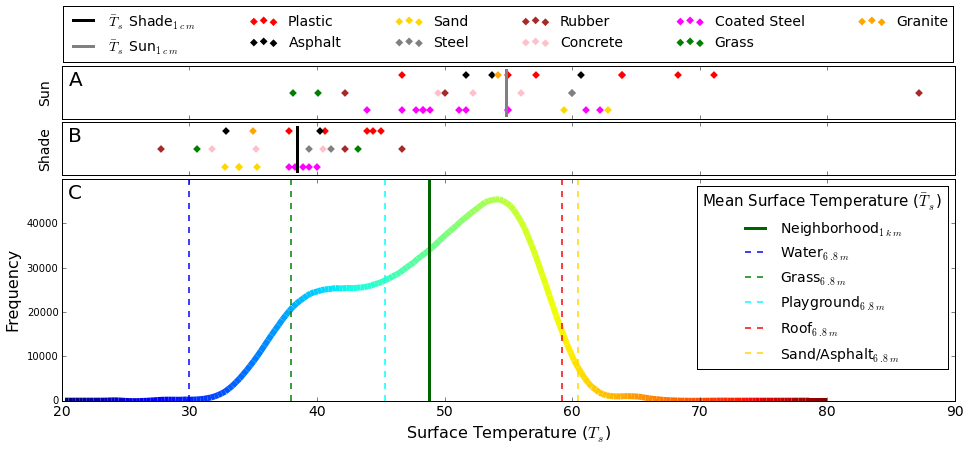

In [108]:
plt.figure(figsize=[20,6]) 

ax1 = plt.subplot(18,1,(1,3))
ax2 = plt.subplot(18,1,(4,6))
ax3 = plt.subplot(18,1,(7,18))
# ax1.scatter(specs, zeros, s=60, marker = 's', c=specs, cmap='summer',label = 'sun')
# ax2.scatter(specs2, zeros2, s=60, marker = 's',linewidth = 0, c=specs2, cmap='winter',label = 'shade')

ax1.scatter(P, Pz, s=30, marker = 'D',linewidth = 0, c='r',label = 'Plastic')
ax1.scatter(A, Az, s=30, marker = 'D',linewidth = 0, c='black',label = 'Asphalt')
ax1.scatter(S, Sz, s=30, marker = 'D',linewidth = 0, c='gold',label = 'Sand')
ax1.scatter(St, Stz, s=30, marker = 'D',linewidth = 0, c='gray',label = 'Steel')
ax1.scatter(R, Rz, s=30, marker = 'D',linewidth = 0, c='brown',label = 'Rubber')
ax1.scatter(C, Cz, s=30, marker = 'D',linewidth = 0, c='pink',label = 'Concrete')
ax1.scatter(Cs, Csz, s=30, marker = 'D',linewidth = 0, c='magenta',label = 'Coated Steel')
ax1.scatter(G, Gz, s=30, marker = 'D',linewidth = 0, c='g',label = 'Grass')
ax1.scatter(Gr, Grz, s=30, marker = 'D',linewidth = 0, c='orange',label = 'Granite')

ax2.scatter(P2, Pz2, s=30, marker = 'D',linewidth = 0, c='r',label = 'Plastic')
ax2.scatter(A2, Az2, s=30, marker = 'D',linewidth = 0, c='black',label = 'Asphalt')
ax2.scatter(S2, Sz2, s=30, marker = 'D',linewidth = 0, c='gold',label = 'Sand')
ax2.scatter(St2, Stz2, s=30, marker = 'D',linewidth = 0, c='gray',label = 'Steel')
ax2.scatter(R2, Rz2, s=30, marker = 'D',linewidth = 0, c='brown',label = 'Rubber')
ax2.scatter(C2, Cz2, s=30, marker = 'D',linewidth = 0, c='pink',label = 'Concrete')
ax2.scatter(Cs2, Csz2, s=30, marker = 'D',linewidth = 0, c='magenta',label = 'Coated Steel')
ax2.scatter(G2, Gz2, s=30, marker = 'D',linewidth = 0, c='g',label = 'Grass')
ax2.scatter(Gr2, Grz2, s=30, marker = 'D',linewidth = 0, c='orange',label = 'Granite')



#ax3.scatter(cut1,ycut1,s=100,marker='.',linewidth = 0,c=cut1,cmap='jet')


x = cut1
y = ycut1
# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be numlines x points per line x 2 (x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create the line collection object, setting the colormapping parameters.
# Have to set the actual values used for colormapping separately.
lc = LineCollection(segments, cmap='jet')
lc.set_array(x)
lc.set_linewidth(6)

ax3.add_collection(lc)


#ax1.get_yaxis().set_visible(False)
#ax2.get_yaxis().set_visible(False)
ax1.get_yaxis().set_ticklabels([]) #takes away only labels
ax2.get_yaxis().set_ticklabels([]) 
for tic in ax1.yaxis.get_major_ticks(): #takes away only ticks
    tic.tick1On = tic.tick2On = False
for tic in ax2.yaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
ax1.set_xlim(20,90)
ax2.set_xlim(20,90)
ax3.set_xlim(20,90)
# ax3.set_xlim(0,9)
#ax1.get_xaxis().set_visible(False) #takes away all x axis 
#ax2.get_xaxis().set_visible(False)
ax1.get_xaxis().set_ticklabels([]) #takes away only labels
ax2.get_xaxis().set_ticklabels([])
ax3.set_xlabel('Surface Temperature ($T_s$)',fontsize=16)
ax3.set_ylabel('Frequency', fontsize=16)
ax3.set_ylim(0,max(freq1))
ax3.set_yticklabels([0,'10000','20000','30000','40000'],fontsize=10)
ax3.set_xticklabels([20,30,40,50,60,70,80,90],fontsize=14)
ax1.set_ylabel('Sun', fontsize=14)
ax2.set_ylabel('Shade', fontsize=14)

X3 = [54.8,54.8]
Y3 = [-0.5,0.5]
ax1.plot(X3,Y3,'-',color = 'black', linewidth = 3,linestyle = '-',label = r'$\barT_s$ Shade$_1$$_c$$_m$')
ax1.plot(X3,Y3,'-',color = 'grey', linewidth = 3,linestyle = '-', label = r'$\barT_s$ Sun$_1$$_c$$_m$')
X = [38.4,38.4]
Y = [-0.5,0.5]
ax2.plot(X,Y,'-',color = 'black',linewidth = 3,linestyle = '-',label = 'Shade$_1$$_c$$_m$')
#ax2.plot(X,Y,'-',color = 'black',linewidth = 3,linestyle = '-')

X2 = [48.8,48.8]
Y2 = [0,50000]
ax3.plot(X2,Y2,'-',color = 'darkgreen',linewidth = 3,linestyle = '-',label = 'Neighborhood$_1$$_k$$_m$')
X8 = [30,30]
Y8 = [0,50000]
ax3.plot(X8,Y8,'-',color = 'blue', linewidth = 1.5,linestyle = '--', label = 'Water$_6$$_.$$_8$$_m$')
X4 = [38,38]
Y4 = [0,50000]
ax3.plot(X4,Y4,'-',color = 'green',linewidth = 1.5,linestyle = '--',label = 'Grass$_6$$_.$$_8$$_m$')
X9 = [45.3,45.3]
Y9 = [0,50000]
ax3.plot(X9,Y9,'-',color = 'cyan', linewidth = 1.5,linestyle = '--', label = 'Playground$_6$$_.$$_8$$_m$')
# X5 = [55,55]
# Y5 = [0,50000]
# ax3.plot(X5,Y5,'-',color = 'brown',linewidth = 1.5,linestyle = '--',label = '$RR$$_6$$_.$$_8$$_m$')
# X6 = [53,53]
# Y6 = [0,50000]
# ax3.plot(X6,Y6,'-',color = 'pink', linewidth = 1.5,linestyle = '--', label = '$C$$_6$$_.$$_8$$_m$')
X0 = [59.2,59.2]
Y0 = [0,50000]
ax3.plot(X0,Y0,'-',color = 'red', linewidth = 1.5,linestyle = '--', label = 'Roof$_6$$_.$$_8$$_m$')
X7 = [60.5,60.5]
Y7 = [0,50000]
ax3.plot(X7,Y7,'-',color = 'gold',linewidth = 1.5,linestyle = '--',label = 'Sand/Asphalt$_6$$_.$$_8$$_m$')


ax3.text(0.008, 0.98,'C', fontsize=20, #fontweight='bold',
         horizontalalignment='left',verticalalignment='top',transform = ax3.transAxes)
ax2.text(0.009, 0.92,'B', fontsize=20, #fontweight='bold',
         horizontalalignment='left',verticalalignment='top',transform = ax2.transAxes)
ax1.text(0.008, 0.92,'A', fontsize=20, #fontweight='bold',
         horizontalalignment='left',verticalalignment='top',transform = ax1.transAxes)

# Shrink current axis by 20%
box1 = ax1.get_position()
ax1.set_position([box1.x0, box1.y0, box1.width * 0.8, box1.height])
box2 = ax2.get_position()
ax2.set_position([box2.x0, box2.y0, box2.width * 0.8, box2.height])
box3 = ax3.get_position()
ax3.set_position([box3.x0, box3.y0, box3.width * 0.8, box3.height])

# Put a legend to the right of the current axis
#ax1.legend(loc='upper left', bbox_to_anchor=(1, 1.13))
ax1.legend(bbox_to_anchor=(0., 1.043, 1., .102), loc=3, fontsize=14,
           ncol=6, mode='expand', borderaxespad=0.1)

#ax2.legend(loc='upper right')
ax3.legend(loc='upper right',title=r'Mean Surface Temperature ($\bar T_s$)', fontsize=14)
ax3.get_legend().get_title().set_fontsize('15')
# ax1.text(-0.08, 0.5, 'A',size=16,weight='bold',horizontalalignment='center',verticalalignment='center',transform=ax1.transAxes)
# ax2.text(-0.08, 0.5, 'B',size=16,weight='bold',horizontalalignment='center',verticalalignment='center',transform=ax2.transAxes)
# ax3.text(-0.08, 0.9, 'C',size=16,weight='bold',horizontalalignment='center',verticalalignment='center',transform=ax3.transAxes)


plt.savefig("10_08.jpg", format="jpg",bbox_inches='tight')